<a href="https://colab.research.google.com/github/dikshaadke/DataScience/blob/master/NPTEL_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Feature Extraction with Python***

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision import datasets                                                           #torchvision specifically used for CV
import PIL                                                                                 #python imaging library for reading, writing, showing images
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops                #greycopros for getting only main features 
from skimage.filters import gabor
import pickle                                                                              #storing datasets
import numpy as np
import tqdm

In [ ]:
trainDset =  datasets.CIFAR10('./cifar10/', train=True, download=True) 
testDset =  datasets.CIFAR10('./cifar10/', train=False, download=True)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./cifar10/cifar-10-python.tar.gz


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10/
Files already downloaded and verified


In [ ]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainDset)))
print('No. of samples in test set: '+str(len(testDset)))

No. of samples in train set: 50000
No. of samples in test set: 10000


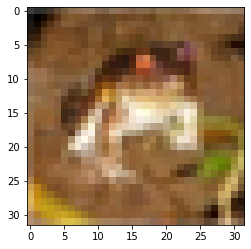

In [ ]:
# Feature extraction on single image
img = trainDset[0][0] #PIL image
img_gray = img.convert('L') #Converting to grayscale
img_arr = np.array(img_gray) #Converting to array
plt.imshow(img)

# ***Local Binary Pattern***

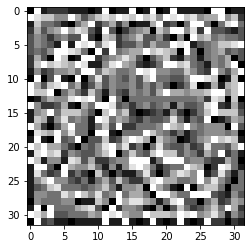

In [ ]:
# Finding LBP
feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255) #Converting to unit8
lbp_img = PIL.Image.fromarray(feat_lbp) #Conversion from array to PIL image
plt.imshow(lbp_img,cmap='gray') #Displaying LBP

In [ ]:
# Energy and Entropy of LBP feature
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

LBP energy = 0.14315032958984375
LBP entropy = 2.8972505530220363


In [ ]:
# Finding GLCM features from co-occurance matrix
gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix, 0 is vector angle, 2 is dimentions
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')
print('Contrast = '+str(contrast[0][0]))
print('Dissimilarity = '+str(dissimilarity[0][0]))
print('Homogeneity = '+str(homogeneity[0][0]))
print('Energy = '+str(energy[0][0]))
print('Correlation = '+str(correlation[0][0]))

Contrast = 1296.8916666666667
Dissimilarity = 24.225
Homogeneity = 0.06323755700795276
Energy = 0.027282918445226654
Correlation = 0.6119618429581918


### **Gabor** ***Filter*** - In image processing, a Gabor filter, named after Dennis Gabor, is a linear filter used for texture analysis, which essentially means that it analyzes whether there is any specific frequency content in the image in specific directions in a localized region around the point or region of analysis.

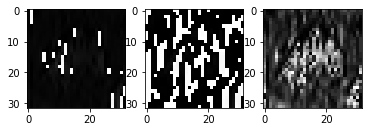

In [ ]:
# Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
# Displaying the filter response
fig, ax = plt.subplots(1,3)    
ax[0].imshow(gaborFilt_real,cmap='gray')
ax[1].imshow(gaborFilt_imag,cmap='gray')
ax[2].imshow(gaborFilt,cmap='gray')

In [ ]:
# Energy and Entropy of Gabor filter response
gabor_hist,_ = np.histogram(gaborFilt,8)
gabor_hist = np.array(gabor_hist,dtype=float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.sum(gabor_prob**2)
gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
print('Gabor energy = '+str(gabor_energy))
print('Gabor entropy = '+str(gabor_entropy))

Gabor energy = 0.24701309204101562
Gabor entropy = 2.3533467655293547


In [ ]:
# Generating training data by extracting features from all images
label = []
featLength = 2+5+2
trainFeats = np.zeros((len(trainDset),featLength)) #Feature vector of each image is of size 1x1030
for tr in tqdm.tqdm_notebook(range(len(trainDset))):

    img = trainDset[tr][0] #One image at a time
    img_gray = img.convert('L') #Converting to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0]) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))   
    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)
    trainFeats[tr,:] = concat_feat #Stacking features vectors for each image
    # Class label
    label.append(trainDset[tr][1])
trainLabel = np.array(label) #Conversion from list to array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


In [ ]:
# Generating testing data by extracting features from all images
label = []
testFeats = np.zeros((len(testDset),featLength)) #Feature vector of each image is of size 1x1030
for ts in tqdm.tqdm_notebook(range(len(testDset))):
    
    img = testDset[ts][0] #One image at a time
    img_gray = img.convert('L') #Converting to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0]) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)    
    testFeats[ts,:] = concat_feat  #Stacking features vectors for each image
    # Class label
    label.append(testDset[ts][1])
testLabel = np.array(label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


Feature normalization

In [ ]:
# Normalizing the train features to the range [0,1]
trMaxs = np.amax(trainFeats,axis=0) #Finding maximum along each column
trMins = np.amin(trainFeats,axis=0) #Finding maximum along each column
trMaxs_rep = np.tile(trMaxs,(50000,1)) #Repeating the maximum value along the rows
trMins_rep = np.tile(trMins,(50000,1)) #Repeating the minimum value along the rows
trainFeatsNorm = np.divide(trainFeats-trMins_rep,trMaxs_rep) #Element-wise division
# Normalizing the test features
tsMaxs_rep = np.tile(trMaxs,(10000,1)) #Repeating the maximum value along the rows
tsMins_rep = np.tile(trMins,(10000,1)) #Repeating the maximum value along the rows
testFeatsNorm = np.divide(testFeats-tsMins_rep,tsMaxs_rep) #Element-wise division

Saving feature matrices to disk

In [ ]:
# Saving normalized training data and labels
with open("trainFeats.pckl", "wb") as f:
    pickle.dump(trainFeatsNorm, f)
with open("trainLabel.pckl", "wb") as f:
    pickle.dump(trainLabel, f)
    
# Saving normalized testing data and labels
with open("testFeats.pckl", "wb") as f:
    pickle.dump(testFeatsNorm, f)
with open("testLabel.pckl", "wb") as f:
    pickle.dump(testLabel, f)
    
print('Files saved to disk!')

Files saved to disk!


## **Classification with Perceptron Model **bold text**

In [ ]:
%matplotlib inline
import os
import time
import tqdm
import torch
import pickle
import numpy as np
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader

print(torch.__version__) # This code has been updated for PyTorch 1.0.0


savePath = 'lecture5_output/'
if not os.path.isdir(savePath):
    os.makedirs(savePath)

1.6.0+cu101


In [ ]:
# Loading the saved features
with open("trainFeats.pckl", "rb") as f:
    trainFeats = pickle.load(f)
with open("trainLabel.pckl", "rb") as f:
    trainLabel = pickle.load(f)
    
with open("testFeats.pckl", "rb") as f:
    testFeats = pickle.load(f)
with open("testLabel.pckl", "rb") as f:
    testLabel = pickle.load(f)
    
print('Finished loading saved feature matrices from the disk!')

Finished loading saved feature matrices from the disk!


In [ ]:
# Defining the perceptron
class perceptron(nn.Module):
    def __init__(self,n_channels): #n_channels => length of feature vector
        super(perceptron, self).__init__()
        self.L = nn.Linear(n_channels,10) #Mapping from input to output
    def forward(self,x): #x => Input
        x = self.L(x) #Feed-forward  
        x = F.softmax(x,dim=1) #Softmax non-linearity, dim=1 corresponds to labels
        return x

In [ ]:

# Generating 1-hot label vectors
trainLabel2 = np.zeros((50000,10))
testLabel2 = np.zeros((10000,10))
for d1 in range(trainLabel.shape[0]):
    trainLabel2[d1,trainLabel[d1]] = 1
for d2 in range(testLabel.shape[0]):
    testLabel2[d2,testLabel[d2]] = 1

In [ ]:
# Checking availability of GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')
    device = "cuda"
    pinMem = True
else:
    print('GPU is not available!')
    device = "cpu"
    pinMem = False

GPU is not available!


In [ ]:
# Creating pytorch dataset from the feature matices
trainDataset = TensorDataset(torch.from_numpy(trainFeats), torch.from_numpy(trainLabel2))
testDataset = TensorDataset(torch.from_numpy(testFeats), torch.from_numpy(testLabel2))
# Creating dataloader
trainLoader = DataLoader(trainDataset, batch_size=64, shuffle=True,num_workers=4, pin_memory=pinMem)
testLoader = DataLoader(testDataset, batch_size=64, shuffle=False,num_workers=4, pin_memory=pinMem)

In [25]:
# Definining the training routine
def train_model(model,criterion,num_epochs,learning_rate):
        start = time.time()
        train_loss = [] #List for saving the loss per epoch    
        train_acc = [] #List for saving the accuracy per epoch  
        tempLabels = [] #List for saving shuffled labels as fed into the network
        for epoch in range(num_epochs):
            epochStartTime = time.time()
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))

            running_loss = 0.0           
            # Loading data in batches
            batch = 0
            for data in tqdm.tqdm_notebook(trainLoader):
                inputs,labels = data
                
                inputs, labels = inputs.float().to(device),labels.float().to(device)
                
                # Initializing model gradients to zero
                model.zero_grad() 
                # Data feed-forward through the network
                outputs = model(inputs)
                # Predicted class is the one with maximum probability
                _, preds = outputs.data.max(1)                 
                # Finding the MSE
                loss = criterion(outputs, labels)
                # Accumulating the loss for each batch
                running_loss += loss.item() 

                # Backpropaging the error
                if batch == 0:
                    totalLoss = loss
                    totalPreds = preds                    
                    tempLabels = labels.data.cpu()
                    batch += 1                    
                else:
                    totalLoss += loss 
                    totalPreds = torch.cat((totalPreds,preds),0)                 
                    tempLabels = torch.cat((tempLabels,labels.data.cpu()),0)
                    batch += 1
                    
            totalLoss = totalLoss/batch
            totalLoss.backward()
            
            # Updating the model parameters
            for f in model.parameters():
                f.data.sub_(f.grad.data * learning_rate) 
                                    
            epoch_loss = running_loss/50000  #Total loss for one epoch
            train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph         
    
            # Accuracy per epoch
            tempLabels = tempLabels.numpy()
            _,totalLabels = np.where(tempLabels==1)                        
            epoch_acc = np.sum(np.equal(totalPreds.cpu().numpy(),np.array(totalLabels)))/50000.0      
            train_acc.append(epoch_acc*100) #Saving the accuracy over epochs for plotting the graph
            
            epochTimeEnd = time.time()-epochStartTime
            print('Average epoch loss: {:.6f}'.format(epoch_loss))
            print('Average epoch accuracy: {:.4f} %'.format(epoch_acc*100))
            print('-' * 25)
            # Plotting Loss vs Epochs
            fig1 = plt.figure(1)        
            plt.plot(range(epoch+1),train_loss,'r--',label='train')      
            if epoch == 0:
                plt.legend(loc='upper right')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.title('Plot of training loss vs epochs')
            fig1.savefig(savePath+'lossPlot.png')
             # Plotting Accuracy vs Epochs
            fig2 = plt.figure(2)        
            plt.plot(range(epoch+1),train_acc,'g--',label='train')  
            if epoch == 0:
                plt.legend(loc='upper left')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.title('Plot of training accuracy vs epochs')
            fig2.savefig(savePath+'accPlot.png')

        time_elapsed = time.time() - start
        print('Training complete in {:.0f}m {:.0f}s'.format(
            time_elapsed // 60, time_elapsed % 60))
        return model


Epoch 0/99


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Average epoch loss: 0.001422
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 1/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 2/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 3/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 4/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 5/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 6/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 7/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 8/99



Average epoch loss: 0.001421
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 9/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 10/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 11/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 12/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 13/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 14/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 15/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 16/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 17/99



Average epoch loss: 0.001420
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 18/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 19/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 20/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 21/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 22/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0000 %
-------------------------
Epoch 23/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 24/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 25/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 26/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 27/99



Average epoch loss: 0.001419
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 28/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 29/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 30/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0020 %
-------------------------
Epoch 31/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0040 %
-------------------------
Epoch 32/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 33/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 34/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 35/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 36/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 37/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 38/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 39/99



Average epoch loss: 0.001418
Average epoch accuracy: 10.0040 %
-------------------------
Epoch 40/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0040 %
-------------------------
Epoch 41/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0040 %
-------------------------
Epoch 42/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0040 %
-------------------------
Epoch 43/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0060 %
-------------------------
Epoch 44/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0100 %
-------------------------
Epoch 45/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0180 %
-------------------------
Epoch 46/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0220 %
-------------------------
Epoch 47/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0200 %
-------------------------
Epoch 48/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0200 %
-------------------------
Epoch 49/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0240 %
-------------------------
Epoch 50/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0240 %
-------------------------
Epoch 51/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0240 %
-------------------------
Epoch 52/99



Average epoch loss: 0.001417
Average epoch accuracy: 10.0280 %
-------------------------
Epoch 53/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0280 %
-------------------------
Epoch 54/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0320 %
-------------------------
Epoch 55/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0300 %
-------------------------
Epoch 56/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0360 %
-------------------------
Epoch 57/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0360 %
-------------------------
Epoch 58/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0380 %
-------------------------
Epoch 59/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0500 %
-------------------------
Epoch 60/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0540 %
-------------------------
Epoch 61/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0560 %
-------------------------
Epoch 62/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0560 %
-------------------------
Epoch 63/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0560 %
-------------------------
Epoch 64/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0580 %
-------------------------
Epoch 65/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0600 %
-------------------------
Epoch 66/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0640 %
-------------------------
Epoch 67/99



Average epoch loss: 0.001416
Average epoch accuracy: 10.0680 %
-------------------------
Epoch 68/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0720 %
-------------------------
Epoch 69/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0800 %
-------------------------
Epoch 70/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0840 %
-------------------------
Epoch 71/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0940 %
-------------------------
Epoch 72/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0920 %
-------------------------
Epoch 73/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0980 %
-------------------------
Epoch 74/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.0960 %
-------------------------
Epoch 75/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1040 %
-------------------------
Epoch 76/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1080 %
-------------------------
Epoch 77/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1120 %
-------------------------
Epoch 78/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1200 %
-------------------------
Epoch 79/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1260 %
-------------------------
Epoch 80/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1260 %
-------------------------
Epoch 81/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1340 %
-------------------------
Epoch 82/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1360 %
-------------------------
Epoch 83/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1360 %
-------------------------
Epoch 84/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1320 %
-------------------------
Epoch 85/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1360 %
-------------------------
Epoch 86/99



Average epoch loss: 0.001415
Average epoch accuracy: 10.1420 %
-------------------------
Epoch 87/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1420 %
-------------------------
Epoch 88/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1480 %
-------------------------
Epoch 89/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1460 %
-------------------------
Epoch 90/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1480 %
-------------------------
Epoch 91/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1540 %
-------------------------
Epoch 92/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1560 %
-------------------------
Epoch 93/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1560 %
-------------------------
Epoch 94/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1640 %
-------------------------
Epoch 95/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1700 %
-------------------------
Epoch 96/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1680 %
-------------------------
Epoch 97/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1860 %
-------------------------
Epoch 98/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1940 %
-------------------------
Epoch 99/99



Average epoch loss: 0.001414
Average epoch accuracy: 10.1920 %
-------------------------
Training complete in 4m 33s


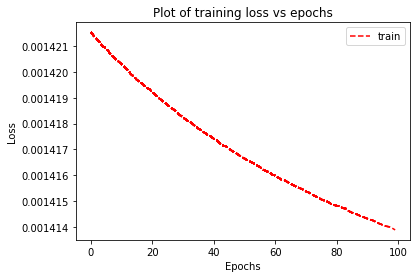

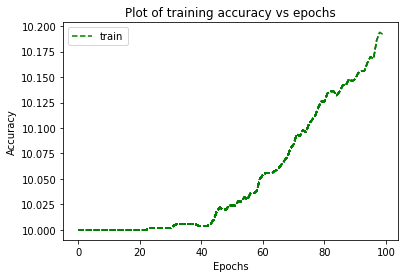

In [27]:
featLength = 2+5+2
# Initilaizing the model
model = perceptron(featLength).to(device)
criterion = nn.MSELoss() 
model = train_model(model,criterion,num_epochs=100,learning_rate=1) # Training the model

In [28]:
test_running_corr = 0
# Loading data in batches
batches = 0
testLabels = []

model.eval() # Testing the model in evaluation mode

for tsData in tqdm.tqdm_notebook(testLoader):
    inputs,labels = tsData
    
    inputs, labels = inputs.float().to(device),labels.float()      
    
    with torch.no_grad(): # No back-propagation during testing; gradient computation is not required
        
        # Feedforward train data batch through model
        output = model(inputs) 
        # Predicted class is the one with maximum probability
        _,preds = output.data.max(1)    
        if batches==0:
            totalPreds = preds
            testLabels = torch.argmax(labels,dim=1) # Converting 1-hot vector labels to integer labels
            batches = 1
        else:
            totalPreds = torch.cat((totalPreds,preds),0)
            testLabels = torch.cat((testLabels,torch.argmax(labels,dim=1)),0) 

# Finding total number of correct predictions
ts_corr = np.sum(np.equal(totalPreds.cpu().numpy(),testLabels.numpy()))
# Calculating accuracy
ts_acc = ts_corr/testLabels.shape[0]
print('Accuracy on test set = '+str(ts_acc*100)+'%')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Accuracy on test set = 10.16%
